# Redes Neuronales de convulación para clasificación de imagenes 

### Librerias

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Dataset

El objetivo de esde projecto es crear una red neuronal convolucional capaz de distinguir entre imagenes de perros y gatos.

Aquí un ejemplo de una de las imagenes con las que entrenaré la red:

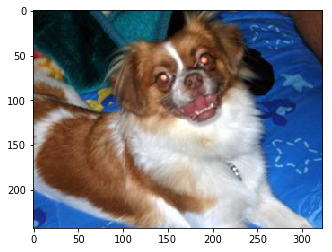

In [146]:
from keras.preprocessing import image

imagen = image.load_img("D:/DATASET/pets/training_set/dogs/dog.35.jpg")

plt.imshow(imagen);

¿Cuantas imagenes usaré? He dividido previamente el dataset en dos carpetas, una con imagenes de gatos y otra con perros, así mismo he separado también cada carpeta en su correspondiente train - test para evaluar el modelo

In [39]:
pets_train = next(os.walk("D:/DATASET/pets/training_set/cats/"))[2]
len(gatos_train)

4001

> 4001 Imagenes de cada categória (8002 imagenes en total) para entrenar el modelo 

In [41]:
gatos_train = next(os.walk("D:/DATASET/pets/test_set/cats/"))[2]
len(gatos_train)

1001

> 1001 imagenes (2002 en total) para evaluar el modelo 

Asi que bueno, tengo 8002 dos imagenes de amigos peludos y quiero poder clasificarlas automáticamente, ¿Cómo lo haré?

### Arquitectura de la red convolucional

In [58]:
# Librerias de Keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Inicializar keras
model = Sequential()

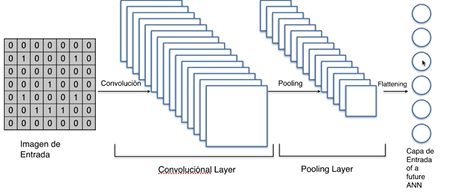

## ¿Como funciona una Red neuronal de convolución? 

### Pixels

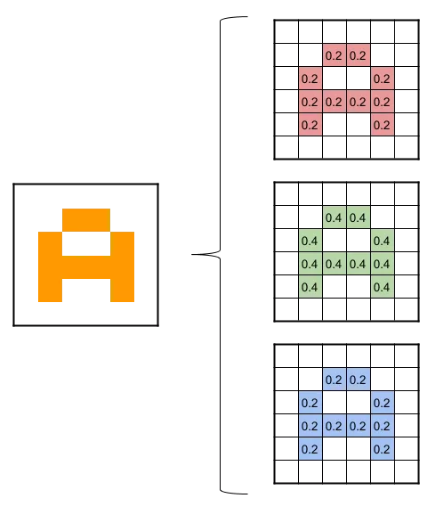

Una imagen está compuesta por pixels, la cual tendrá x pixels de largo  y pixels de alto, pero además debe tenerse en cuenta de que una imagen a color se distribuye en tres canales (rojo,verde y azul). 

Por ejemplo, una imagen de 64 pixels a color, daría una entrada de 64x64x3 (12288) de datos. 

¿Puedes pasar directamente una imagen como matriz de datos a una red? Sí...pero explotaría y con tal cantidad de datos no aprendería bien; antes debe realizarse un pre procesado de datos

Usaré directamente la plantilla aportada por keras: 

In [61]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory("D:/DATASET/pets/training_set",        #Directorio con imagenes 
                                                 target_size = (64, 64),                #Tamaño para cargar las imagenes
                                                 batch_size = 32,         # Reajusta los pesos cada 32 imagenes 
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory("D:/DATASET/pets/test_set",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [96]:
train_set.class_indices 

{'cats': 0, 'dogs': 1}

> La codificación es tal que gato será 0 y perro 1 

In [79]:
 train_set[0][0][0]

array([[[0.70980394, 0.8313726 , 0.90196085],
        [0.70980394, 0.8313726 , 0.90196085],
        [0.70980394, 0.8313726 , 0.90196085],
        ...,
        [0.28235295, 0.3137255 , 0.25490198],
        [0.28235295, 0.3137255 , 0.25490198],
        [0.28235295, 0.3137255 , 0.25490198]],

       [[0.70980394, 0.8313726 , 0.90196085],
        [0.70980394, 0.8313726 , 0.90196085],
        [0.70980394, 0.8313726 , 0.90196085],
        ...,
        [0.28235295, 0.3137255 , 0.25490198],
        [0.28235295, 0.3137255 , 0.25490198],
        [0.28235295, 0.3137255 , 0.25490198]],

       [[0.70980394, 0.8313726 , 0.90196085],
        [0.70980394, 0.8313726 , 0.90196085],
        [0.70980394, 0.8313726 , 0.90196085],
        ...,
        [0.28235295, 0.3137255 , 0.25490198],
        [0.28235295, 0.3137255 , 0.25490198],
        [0.28235295, 0.3137255 , 0.25490198]],

       ...,

       [[0.5019608 , 0.48627454, 0.29803923],
        [0.5019608 , 0.48627454, 0.29803923],
        [0.5019608 , 0

 > Aquí se muestran los pixeles cargados de la primera imagen, una matriz 64x64 en varias dimensiones al tener colores

In [80]:
train_set[0][0][0].shape

(64, 64, 3)

### Primera capa de convolución

> Mapa de características 

Ahora bien, para reducir la matriz de pixel en dimensiones se realiza un mapa de características aplicando filtros, lo cual consiste en tomar una submatriz de la imagen y reducirla.


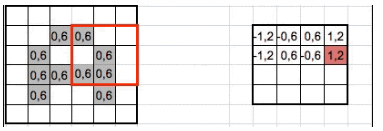

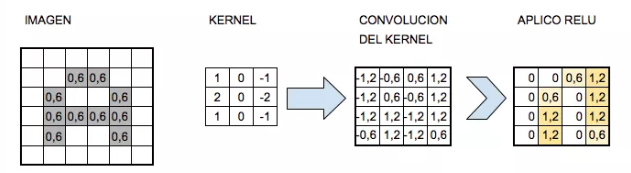

In [59]:
# Capa de convolución
model.add(Conv2D(filters = 32, 
                 kernel_size = (3, 3), 
                 input_shape = (64, 64, 3), 
                 activation = 'relu'))

> Se añade una primera capa de convolución en 2D (En lugar del clasico Dense) con los siguientes parámetros:
- Nº de mapas de características: 32 con filtros de tamaño 3x3
- Imagenes de entrada con medidas 64x64x3 (tres canales de color). 

La forma mas simple de resumirlo es que la capa de convolución es como una capa oculta que trata de extraer las características más importantes de la imagen (como los bordes)

*Establezco imagenes 64x64 a color dado que no tengo un ordenador de la NASA

### Max Pooling

Una vez se tiene la matriz reducida, se puede reducir todavía más aplicando un max pooling, ¿Qué es?
Simplemente se divide en un un subconjunto de matrices y se guarda únicamente el valor más alto:

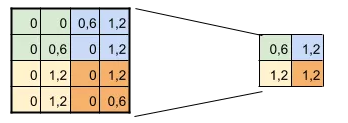

In [60]:
# Capa de Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))      #max-pooling con submatrices 2x2

### Flattering

El siguiente paso que quedaría es aplanar la matriz:

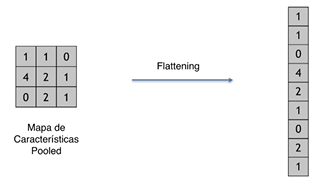

*Dado que el resultado final es un vector de datos, realmente podrias pasar dicho vector como entrada a cualquier tipo de modelo, no necesariamente una red neuronal.

### Modelo clasificación

In [ ]:
#Red neuronal de toda la vida  
model.add(Dense(units = 128, activation = 'relu'))         #Capa oculta 
model.add(Dense(units = 1, activation = 'sigmoid'))        #Capa de salida 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])    #compilación 


#Entrenar el modelo: 
model.fit_generator(train_set,
                         steps_per_epoch = 8002,       #Nº imagenes 
                         epochs = 32,
                         validation_data = test_set,
                         validation_steps = 2000)

> Es la capa oculta la que realizará un problema común de clasificación

> La capa de salida al ser una clasificación binaria es suficiente con una neurona de salida 1-0

> Optimizador adam, función de pérdida binary_crossentropy y una métrica para evaluar el modelo accuracy

# Código completo

In [92]:
# Código completo:

# Librerias de Keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

#------------------------------------------------------------------------------------------------------------------------
#Extraer pixels

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory("D:/DATASET/pets/training_set",        #Directorio con imagenes 
                                                 target_size = (64, 64),                #Tamaño para cargar las imagenes
                                                 batch_size = 32,         # Reajusta los pesos cada 32 imagenes 
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory("D:/DATASET/pets/test_set",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


#------------------------------------------------------------------------------------------------------------------------
# Inicializar keras
model = Sequential()

# Capa de convolución
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Capa de Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))      #max-pooling con submatrices 2x2

# Segunda capa de convolución 
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

#Max-Pooling segunda capa 
model.add(MaxPooling2D(pool_size = (2, 2)))

#Flattering
model.add(Flatten())


#------------------------------------------------------------------------------------------------------------------------
#Red neuronal de toda la vida  
model.add(Dense(units = 128, activation = 'relu'))         #Capa oculta 
model.add(Dense(units = 1, activation = 'sigmoid'))        #Capa de salida 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])    #compilación 

#------------------------------------------------------------------------------------------------------------------------

#Entrenar el modelo: 
model.fit_generator(train_set,
                         steps_per_epoch = 8000,       #Nº imagenes 
                         epochs = 1,
                         validation_data = test_set,
                         validation_steps = 2000)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
8000/8000 [==============================] - 1112s 139ms/step - loss: 0.3671 - accuracy: 0.8267 - val_loss: 0.1948 - val_accuracy: 0.8079


> Dado que el objetivo del notebook es puramente de autoaprendizaje solo realizo un epoch, con lo que se obtiene 82% de accuracy lo cual no está mal

### Guardar modelo 

In [98]:
#Guardar modelo 
model.save("gato_perro.h5")

In [99]:
# Cargar modelo
from keras.models import load_model
gato_perro = load_model("gato_perro.h5")

### Probar modelo 

> Vamos a cargar una imagen del perro de mi tia, el cual ni es muy listo ni parece un perro:

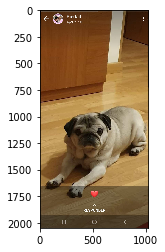

In [125]:
from keras.preprocessing import image

imagen = image.load_img('C:/Users/Willi/Dropbox/Fotos/Gogy.jpg')

plt.imshow(imagen);

In [127]:
from keras.preprocessing import image

#Cargar imagen con formato 64x64
imagen = image.load_img('C:/Users/Willi/Dropbox/Fotos/Gogy.jpg', target_size = (64, 64)) 

#Obtener pixels 
imagen = image.img_to_array(imagen)
imagen = np.expand_dims(imagen, axis = 0)



In [128]:
#Pasar imagen al modelo
resultado = gato_perro.predict(imagen)

resultado

array([[1.]], dtype=float32)

> Un uno significaba perro, ¿es un perro? Bueno, eso dice el modelo ;) 